Lets go with Arima

Import necessary libraries

In [1]:
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15})
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings("ignore")
import math

import statsmodels.graphics.tsaplots as tsaplots
import scipy.stats as stats

Data

Full Market Recovery:

November 2020: The S&P 500 surpassed its pre-pandemic peak for the first time.

"S&P 500 Tops Pre-Pandemic Level for First Time Since February" - The New York Times (November 9, 2020): https://www.nytimes.com/2022/07/29/business/stock-market-july.html

"The S&P 500 Officially Recovers From Its Pandemic Low" - Investopedia (November 9, 2020): https://www.investopedia.com/articles/investing/090414/sp-500-index-you-need-know.asp

In [2]:
start = datetime.datetime(2020, 11, 1)
end = datetime.datetime(2023, 11,1)

Stock = yf.download('UPS', start , end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
Stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,158.880005,161.190002,156.970001,159.550003,144.522369,3924000
2020-11-03,161.250000,164.649994,160.350006,163.479996,148.082184,3142200
2020-11-04,163.729996,165.339996,160.559998,162.580002,147.266983,3530000
2020-11-05,165.600006,165.850006,162.210007,163.559998,148.154663,3998300
2020-11-06,164.080002,168.300003,163.070007,167.679993,151.886597,2960000
...,...,...,...,...,...,...
2023-10-25,148.740005,148.899994,146.009995,146.929993,145.229187,3565800
2023-10-26,142.500000,146.289993,137.929993,138.210007,136.610153,10581400
2023-10-27,138.429993,139.789993,133.679993,134.830002,133.269272,6594600


In [4]:
Stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,184.622812,186.515822,182.722056,184.683700,174.258861,3.258777e+06
std,18.316044,18.456763,18.188923,18.362321,16.420664,1.792739e+06
min,135.910004,139.229996,133.679993,134.830002,133.269272,9.124000e+05
25%,170.165001,171.734997,167.997505,170.132504,161.860931,2.339800e+06
50%,182.454994,184.500000,180.755005,182.740005,175.299751,2.829500e+06
75%,198.017506,199.877502,195.499996,197.980003,186.859741,3.597550e+06
max,230.649994,233.720001,227.229996,232.110001,216.081741,2.053590e+07


<Axes: xlabel='Date', ylabel='Price in USD$'>

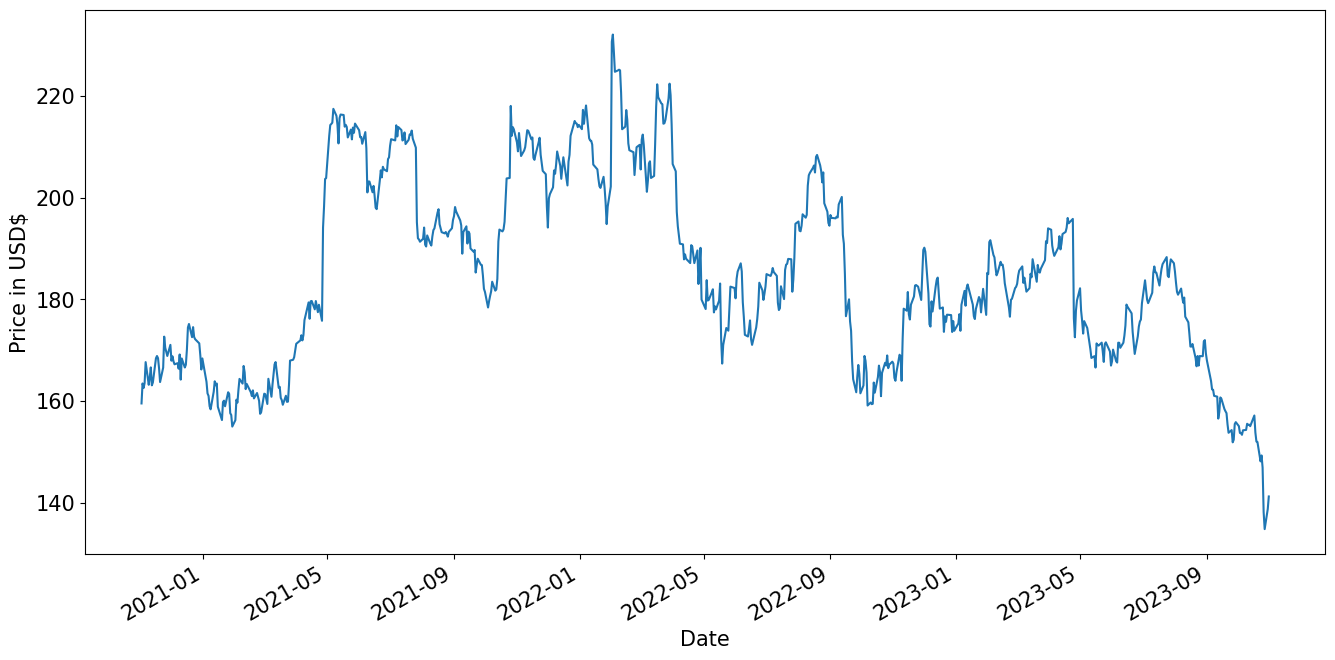

In [5]:
Stock['Close'].plot(figsize=(16, 8), ylabel='Price in USD$')

We need only Closing Price

In [6]:
Stock_pr = np.array(Stock.reset_index()['Close'])

In [7]:
Stock_pr_diff = Stock_pr[1:] - Stock_pr[:-1]
Stock_pr_log = np.log(Stock_pr)
Stock_pr_log_diff = Stock_pr_log[1:] - Stock_pr_log[:-1]

STATIONARITY

In [8]:
result = adfuller(Stock_pr)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(Stock_pr_log_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.161643
p-value: 0.220460
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -25.386954
p-value: 0.000000
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -1.965069
p-value: 0.302096
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic: -19.818510
p-value: 0.000000
	1%: -3.439
	5%: -2.865
	10%: -2.569


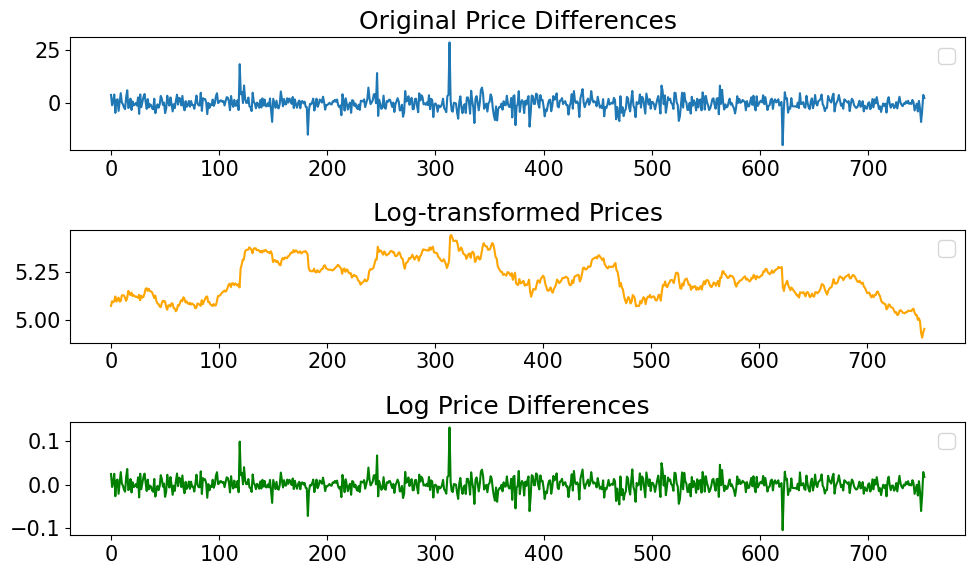

In [9]:
# Plotting all three series in one graph
plt.figure(figsize=(10, 6))

# Original price differences
plt.subplot(3, 1, 1)
plt.plot(Stock_pr_diff)
plt.title('Original Price Differences')
plt.legend()

# Log-transformed prices
plt.subplot(3, 1, 2)
plt.plot(Stock_pr_log, color='orange')
plt.title('Log-transformed Prices')
plt.legend()

# Log price differences
plt.subplot(3, 1, 3)
plt.plot(Stock_pr_log_diff, color='green')
plt.title('Log Price Differences')
plt.legend()

plt.tight_layout()
plt.show()

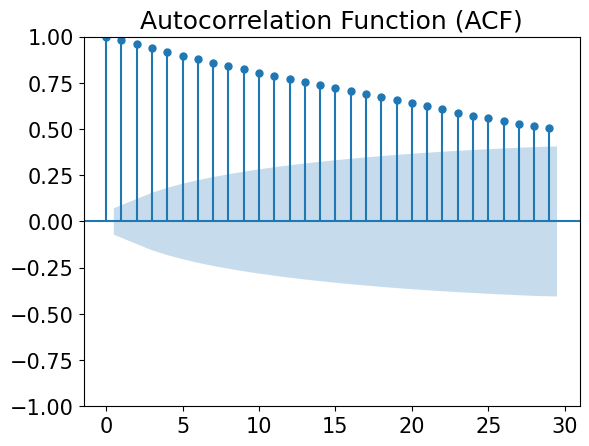

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Assuming 'data' is your time series data (replace this with your actual data)
# For example, if 'data' is a pandas Series:
# data = pd.Series(your_time_series_data)


plot_acf(Stock_pr)
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [11]:
from math import ceil

In [12]:
df = pd.DataFrame(Stock_pr_diff)
# Splitting the data into training (80%) and testing (20%)
train_size = ceil(len(df) * 0.80)  # 80% for training
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [13]:
# Finding the optimal p, d, and q values
best_aic = float("inf")
best_bic = float("inf")
best_order = None

for p in range(6):  # Range for p values
    for d in range(1):  # Range for d values
        for q in range(3):  # Range for q values
            try:
                model = ARIMA(train_data, order=(p, d, q))
                results = model.fit()

                aic = results.aic
                bic = results.bic

                print(f"AIC: {aic}, BIC: {bic}, Order: ({p}, {d}, {q})")

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                if bic < best_bic:
                    best_bic = bic
            except:
                continue

print(f"Best AIC: {best_aic}, Best BIC: {best_bic}")

AIC: 3145.9010708564847, BIC: 3154.704905249939, Order: (0, 0, 0)
AIC: 3145.1651329814445, BIC: 3158.370884571626, Order: (0, 0, 1)
AIC: 3146.823341508354, BIC: 3164.4310102952627, Order: (0, 0, 2)
AIC: 3145.3076100581666, BIC: 3158.513361648348, Order: (1, 0, 0)
AIC: 3146.8704720078526, BIC: 3164.478140794761, Order: (1, 0, 1)
AIC: 3148.760176489235, BIC: 3170.769762472871, Order: (1, 0, 2)
AIC: 3146.81200410988, BIC: 3164.4196728967886, Order: (2, 0, 0)
AIC: 3148.7608458576565, BIC: 3170.7704318412925, Order: (2, 0, 1)
AIC: 3150.7600372265856, BIC: 3177.1715404069487, Order: (2, 0, 2)
AIC: 3148.791299075332, BIC: 3170.800885058968, Order: (3, 0, 0)
AIC: 3150.7608106933926, BIC: 3177.1723138737557, Order: (3, 0, 1)
AIC: 3146.290452732462, BIC: 3177.1038731095523, Order: (3, 0, 2)
AIC: 3150.5805587206487, BIC: 3176.9920619010118, Order: (4, 0, 0)
AIC: 3152.565178423704, BIC: 3183.378598800794, Order: (4, 0, 1)
AIC: 3142.864489031266, BIC: 3178.079826605084, Order: (4, 0, 2)
AIC: 3152.5

In [14]:
model = ARIMA(train_data, order=(1,0,0))
ARIMA_res = model.fit()
print(ARIMA_res.summary());

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  603
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1569.654
Date:                Fri, 15 Dec 2023   AIC                           3145.308
Time:                        22:38:14   BIC                           3158.513
Sample:                             0   HQIC                          3150.447
                                - 603                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0470      0.150      0.313      0.754      -0.247       0.341
ar.L1          0.0655      0.039      1.662      0.096      -0.012       0.143
sigma2        10.6789      0.259     41.247      0.0

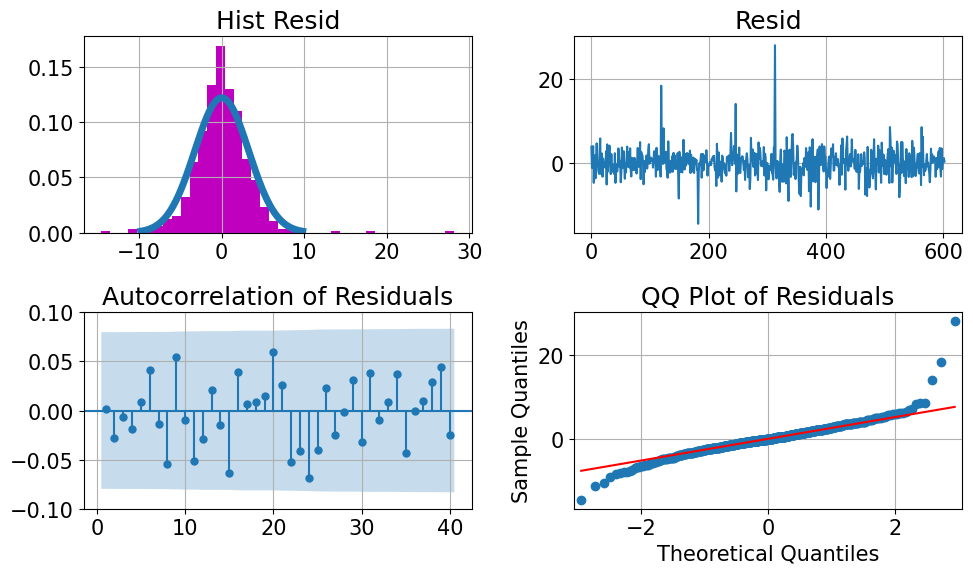

In [15]:

data = ARIMA_res.resid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Histogram of data
ax1.hist(data, bins=40, color='m', density=True)
mu = data.mean()
sigma = data.std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 2419)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth=5)
ax1.grid()
ax1.set_title("Hist Resid")

# Plotting data
ax2.plot(data)
ax2.grid()
ax2.set_title("Resid")

# Autocorrelation plot
tsaplots.plot_acf(data, lags=40, zero=False, ax=ax3, use_vlines=True)
ax3.set_ylim(-0.1, 0.1)
ax3.grid()
ax3.set_title("Autocorrelation of Residuals")

# QQ plot
sm.qqplot(data, line='q', ax=ax4)
ax4.grid()
ax4.set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

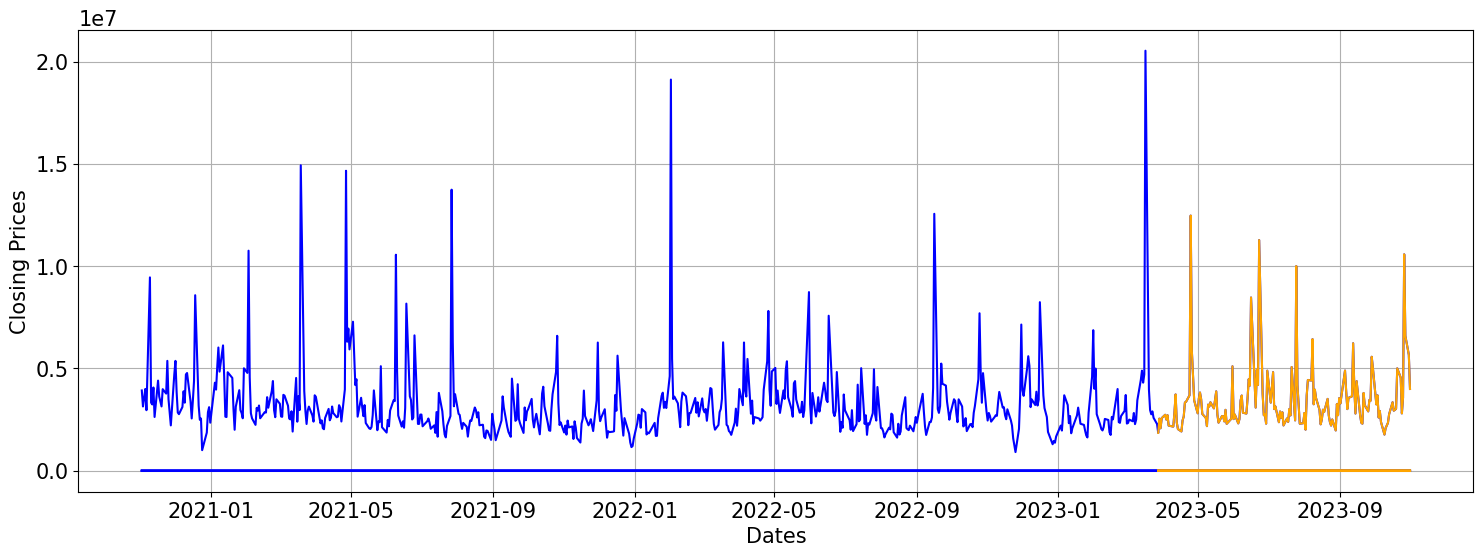

In [16]:
#split data into train and training set
train_data, test_data = Stock[0:int(len(Stock)*0.80)], Stock[int(len(Stock)*0.80):]
training_data = train_data['Close'].values
testing_data = test_data['Close'].values
plt.figure(figsize=(18,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(Stock, 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
#plt.legend()

In [17]:
from sklearn.metrics import mean_squared_error
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(testing_data, model_predictions)
RMSE_error = math.sqrt(mean_squared_error(testing_data, model_predictions))
print('Testing MSE : {}'.format(MSE_error))
print('Testing RMSE : {}'.format(RMSE_error))

Testing MSE : 7.436465888348524
Testing RMSE : 2.726988428348849


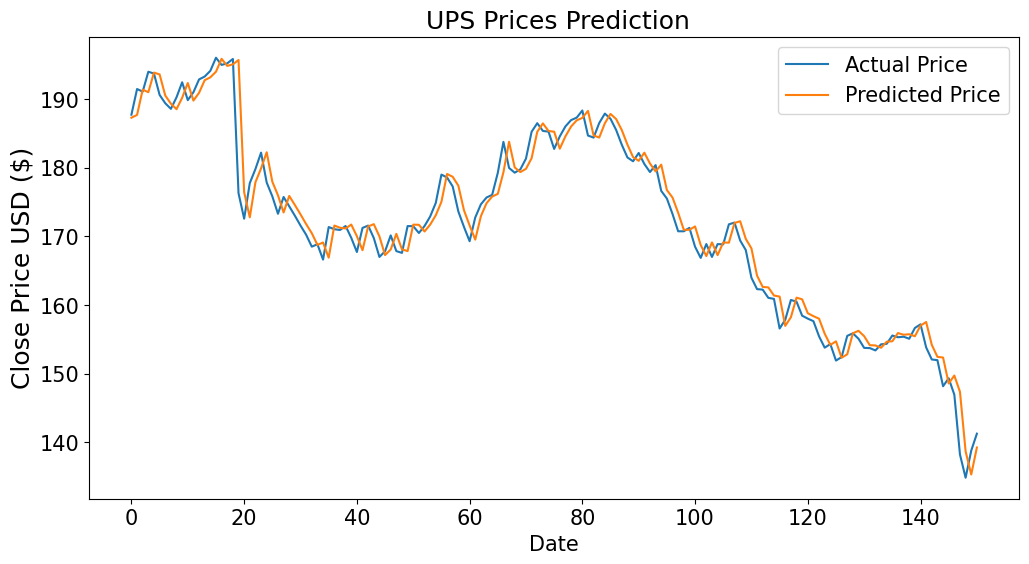

In [18]:
test_set_range = Stock[int(len(Stock)*0.80):].index
plt.figure(figsize=(12,6))
plt.plot(testing_data, label='Actual Price')
plt.plot(pd.DataFrame(model_predictions),label='Predicted Price')
#plt.plot(test_data, color='red', label='Actual Price')
plt.title(' UPS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()